## Handwritten character recognition
### Data interpretation

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
data = pd.read_csv('data/A_Z Handwritten Data.csv').astype('float32')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can observe that the first column is the label

### Separate the labels from the data

In [7]:
x = data.drop('0', axis=1)
y = data['0']

In [8]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float32

In [9]:
y.tail()

372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, dtype: float32

### Splitting the data into train and test data and shaping into 2-dimensional array

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

X_train = np.reshape(X_train.values, (X_train.shape[0], 28, 28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28, 28))

print(f'Train data shape: \t{X_train.shape}')
print(f'Test data shape: \t{X_test.shape}')

Train data shape: 	(297960, 28, 28)
Test data shape: 	(74490, 28, 28)


### Showing a graphical representation of the count for each letter

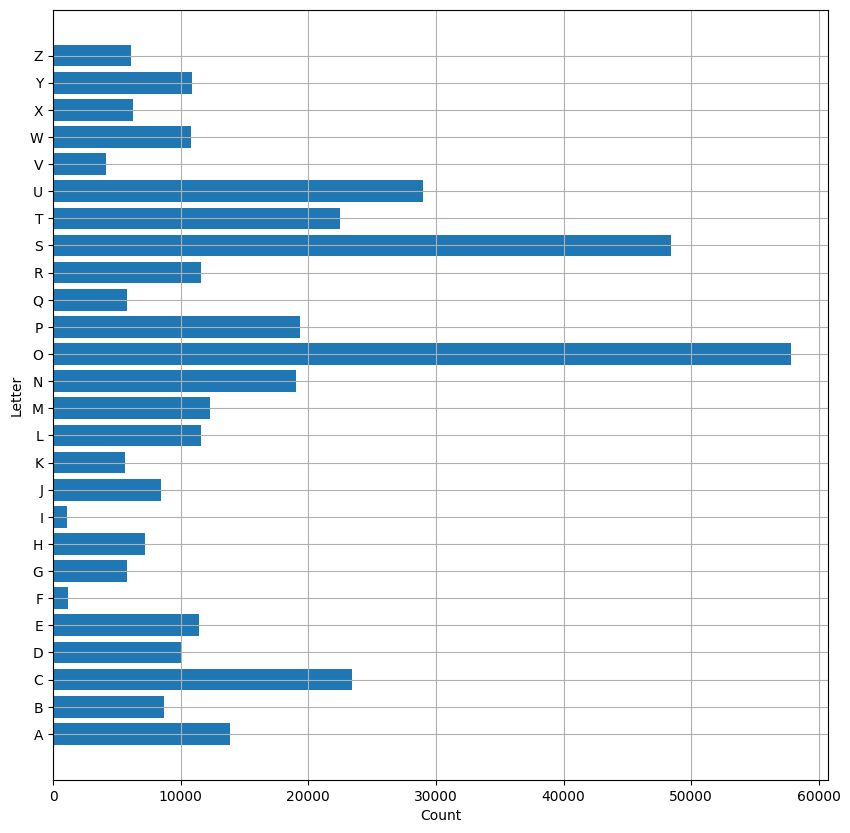

In [11]:
letters = [chr(ord('A') + num) for num in range(26)]     # ['A', 'B', ..., 'Z']
count = np.zeros(26, dtype='int')
y_int = np.int0(y)

for let in range(26):
    count[let] = np.sum(y_int == let)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.barh(letters, count)

plt.xlabel('Count')
plt.ylabel('Letter')
plt.grid()
plt.show()

### Preview a small sub-section of the train data

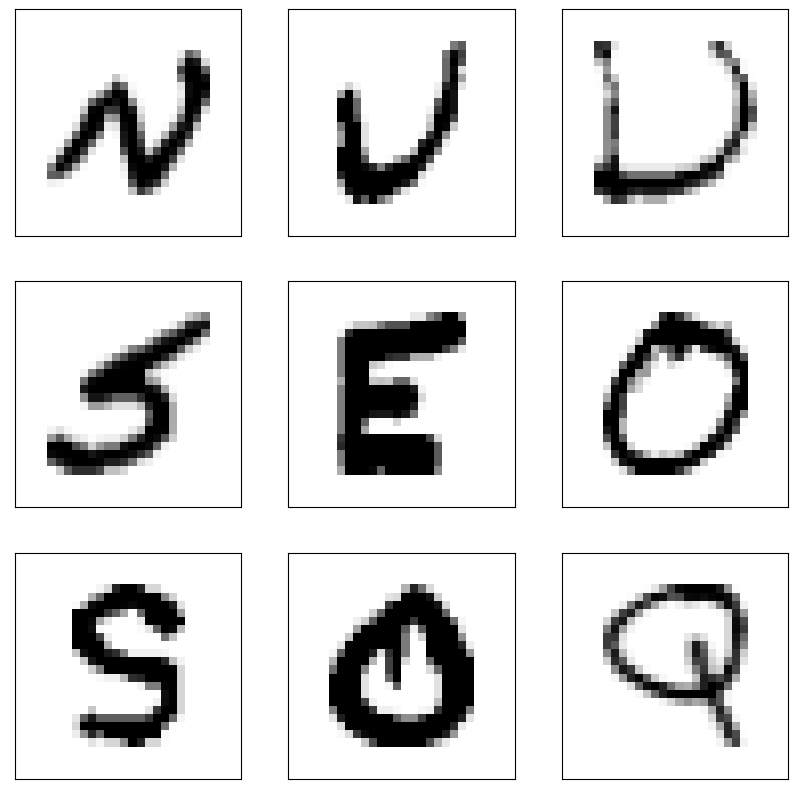

In [12]:
section = shuffle(X_train)[:9]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(section[i], (28, 28)), cmap="Greys")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()

### Re-shaping the data

In [13]:
print(f'Current shape of train data: \t{X_train.shape}')
print(f'Current shape of test data: \t{X_test.shape}')

Current shape of train data: 	(297960, 28, 28)
Current shape of test data: 	(74490, 28, 28)


For the chosen convolutional neural network we need the data to have the shape 28 (height) x 28 (width) x 1 (channel), thus only the channel layer needs to be added

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(f'New shape of the train data: \t{X_train.shape}')

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(f'New shape of the test data: \t{X_test.shape}')

New shape of the train data: 	(297960, 28, 28, 1)
New shape of the test data: 	(74490, 28, 28, 1)


### Converting labels to categorical values

In [15]:
Y_train_cat = to_categorical(Y_train, num_classes=26, dtype='int')
print(Y_train_cat.shape)

Y_test_cat = to_categorical(Y_test, num_classes=26, dtype='int')
print(Y_test_cat.shape)

(297960, 26)
(74490, 26)


### Building the model

Using the LeNet CNN. After trying multiple different options and comparing the results I have decided on using a rectifier liniar unit (relu) activation function instead of a sigmoid one for the layers 1, 3, 6 and 7.

In [16]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', padding='valid'))
model.add(MaxPool2D(strides=2))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [17]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

Compiling the model using the "Adam" optimizer as it has a faster computation time and requires fewer parameters for tuning.

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train_cat, epochs=1, validation_data=(X_test, Y_test_cat))

9312/9312 [==============================] - 47s 5ms/step - loss: 0.2516 - accuracy: 0.9387 - val_loss: 0.1168 - val_accuracy: 0.9655
